In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt

def augment_and_show(img_path, augmentation_fn):
    """
    이미지 경로를 주어받아 해당 이미지를 로드하고, 증강 함수를 적용하여 원본 및 증강된 이미지를 출력합니다.
    :param img_path: 증강을 적용할 이미지의 경로입니다.
    :param augmentation_fn: 이미지에 적용할 증강 함수입니다. 예를 들어, tf.image.flip_left_right
    """
    # 이미지 로드
    image = tf.io.read_file(img_path)
    image = tf.image.decode_png(image, channels=3)

    # 이미지 증강
    augmented_image = augmentation_fn(image)

    # 이미를 출력
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(tf.cast(image, tf.int32))
    plt.subplot(1, 2, 2)
    plt.title('Augmented Image')
    plt.imshow(tf.cast(augmented_image, tf.int32))
    plt.show()

In [53]:
data_path = '/content/drive/MyDrive/eardrum2/last_test_png/'

In [66]:
data_path = '/content/drive/MyDrive/eardrum2/data_2_kfold/train/Abnormal/'

In [67]:
img_path = data_path+'otitexterna_27.png'

In [54]:
img_path = data_path+'11.png'

In [68]:
image = tf.io.read_file(img_path)
image = tf.image.decode_png(image, channels=3)

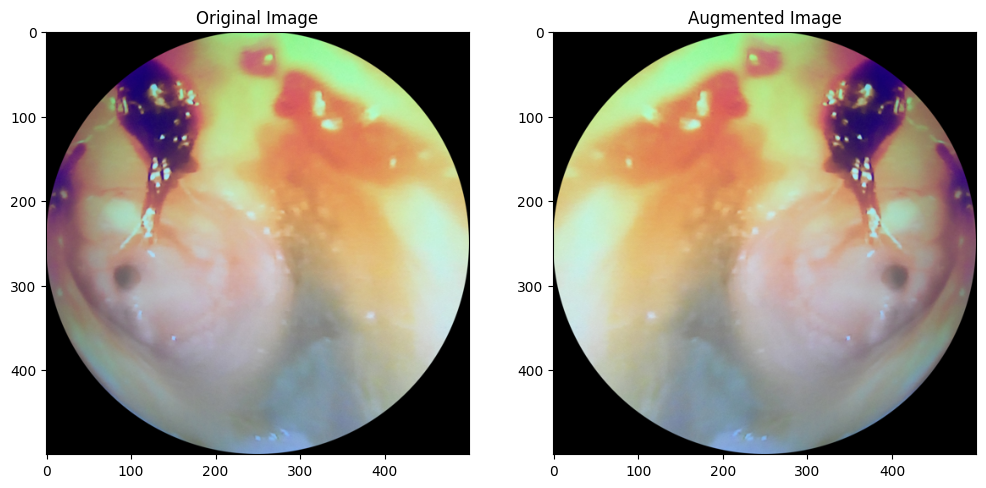

In [69]:
# 증강 함수 적용 예제: 좌우 반전
augment_and_show(img_path, tf.image.flip_left_right)

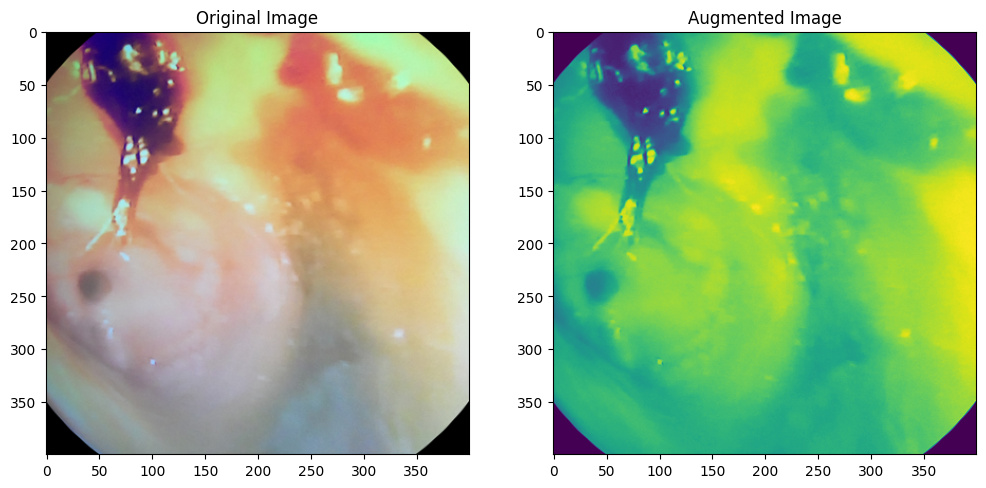

In [65]:
# 증강 함수 적용 예제:
augment_and_show(img_path, tf.image.rgb_to_grayscale)

In [28]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

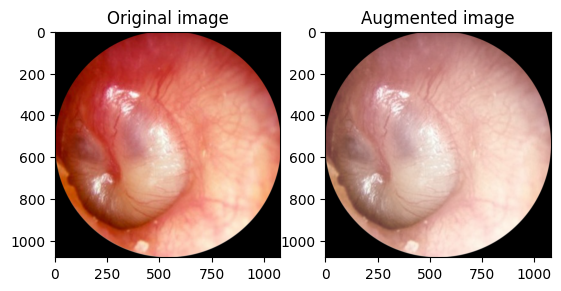

In [40]:
saturated = tf.image.adjust_saturation(image, 0.5)
visualize(image, saturated)

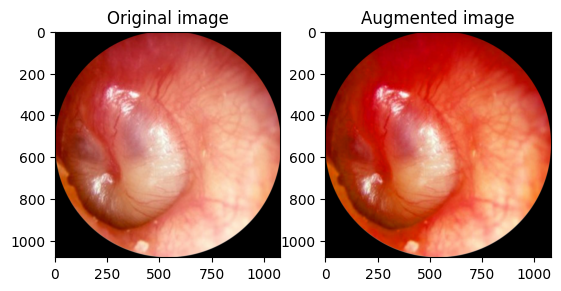

In [43]:
saturated = tf.image.adjust_saturation(image, 1.5)
visualize(image, saturated)

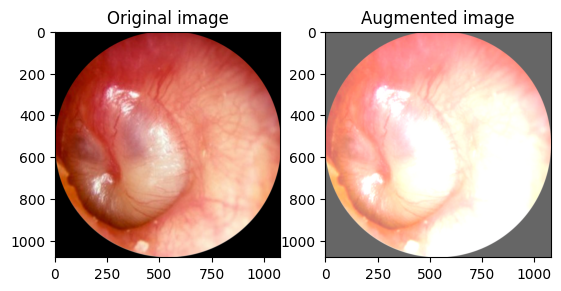

In [33]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

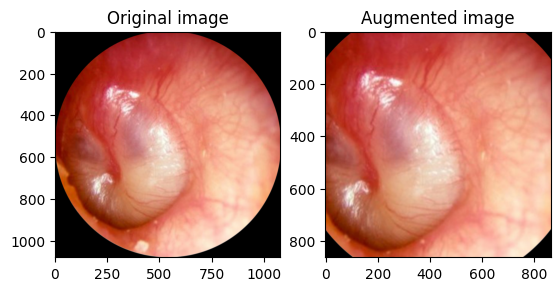

In [49]:
cropped = tf.image.central_crop(image, central_fraction=0.8)
visualize(image, cropped)

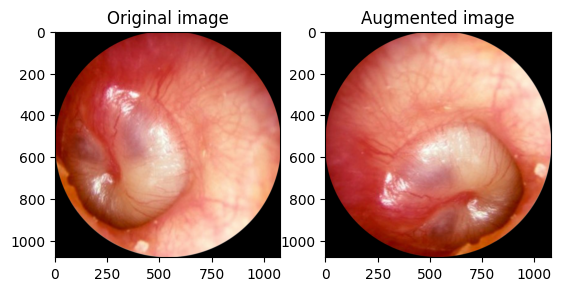

In [35]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

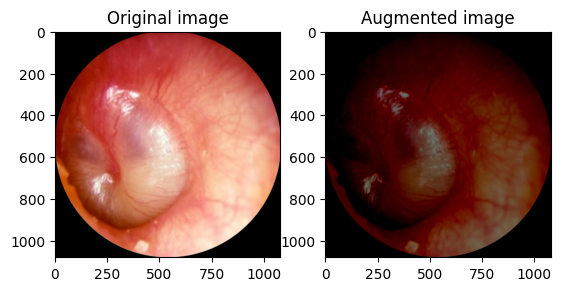

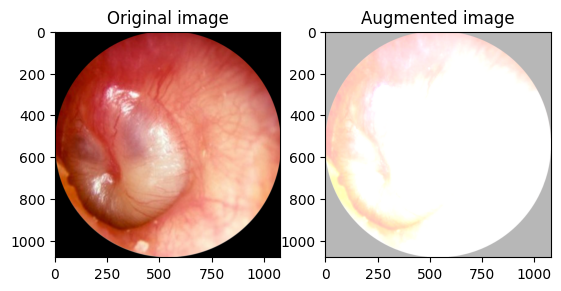

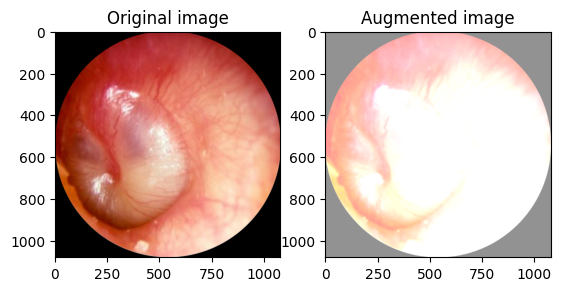

In [36]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

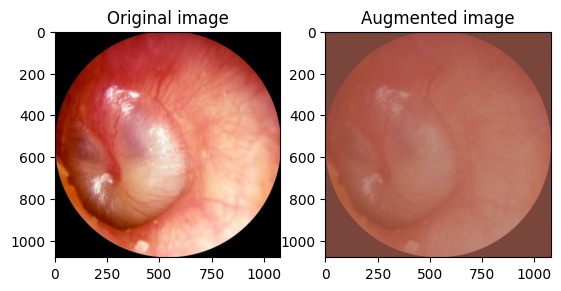

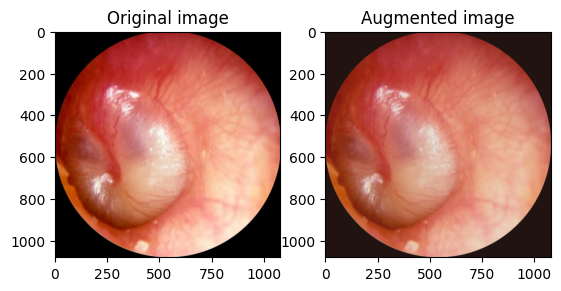

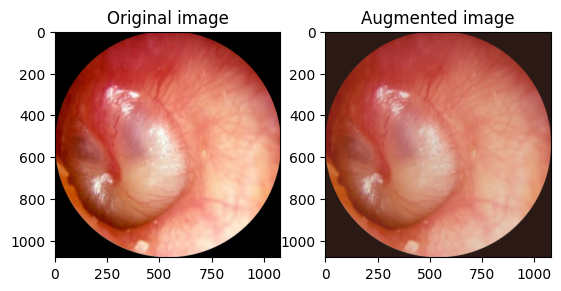

In [37]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed)
  visualize(image, stateless_random_contrast)

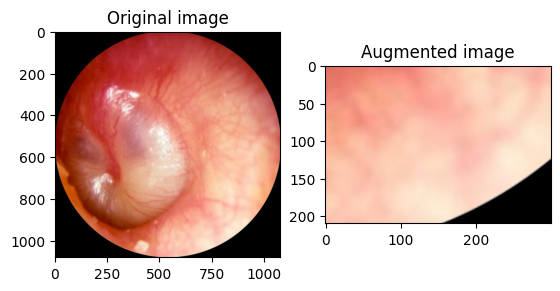

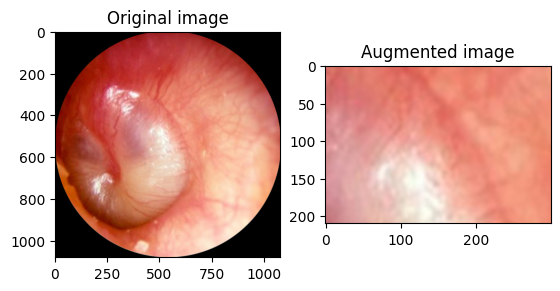

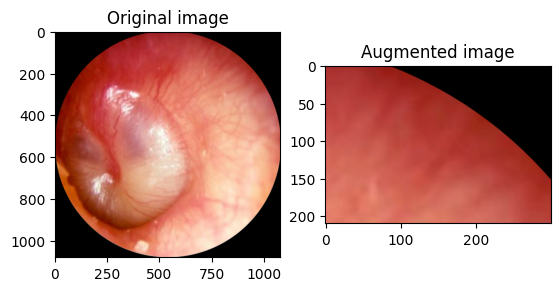

In [38]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)